# [Exploration 18] 다양한 OCR모델 비교하기

Google OCR API, keras-ocr, Tesseract 3가지 OCR모델을 비교하는 프로젝트

---

## 프로젝트 목표
---
- 서비스 기획에 필요한 성능을 위해 여러 OCR모델의 성능을 평가, 비교한다. 

### 내가 기획한 서비스 : 읽는편지
- 시각보조기구가 필요한 경우에 손편지로 소통할 수 있는 서비스 **읽는편지**
- 손편지를 텍스트로 변환해, 텍스트를 음성으로 변환 해야하기 때문에 다양한 글꼴을 정확하게 인식해야한다.

## 프로젝트 설명
---
1. 검증용 데이터셋 준비
    - 한국어로 검증하기 위해 한국어가 쓰여진 이미지 데이터셋을 구축했습니다.
2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
    - 세 가지 모듈을 활용해 결과를 얻습니다.
3. 테스트 결과 정리
    - 테스트 결과를 시각화를 활용해 정리합니다.
4. 결과 분석과 결론 제시
    - 정리한 결과를 분석하고 활용할 수 있는 서비스를 제안합니다.

## 1. 데이터 불러오기

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/image'
data_path

'/home/aiffel-dj26/aiffel/ocr_python/image'

In [3]:
# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/home/aiffel-dj26/aiffel/ocr_python/image/0.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/1.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/2.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/3.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/4.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/5.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/6.jpeg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/7.jpg',
 '/home/aiffel-dj26/aiffel/ocr_python/image/8.png',
 '/home/aiffel-dj26/aiffel/ocr_python/image/9.jpg']

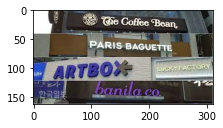

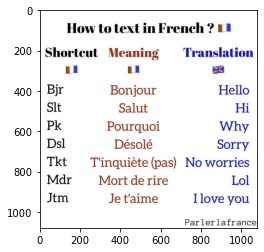

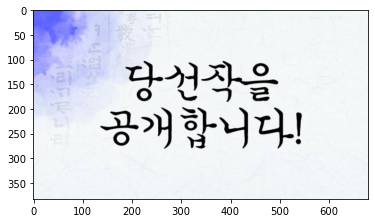

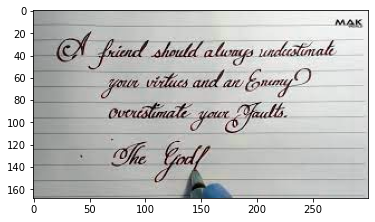

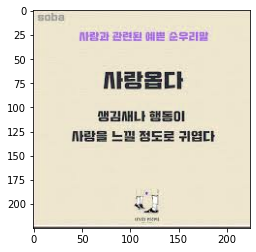

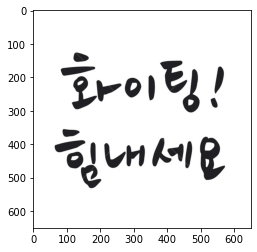

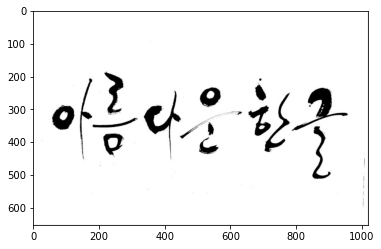

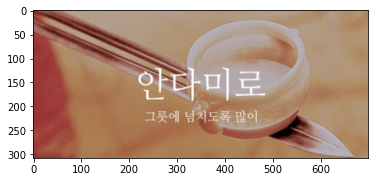

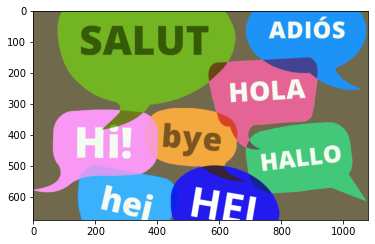

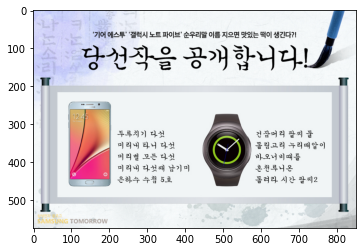

In [4]:
rows = 5
cols = 2
fig = plt.figure(figsize=(20,10))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    plt.imshow(img)
    
    plt.show()

### 데이터 구성 방법
- 총 10장의 이미지 
- 여러 언어에 대한 실험을 위해 한국어, 영어, 프랑스어, 스페인어, 독일어 등의 이미지로 구성했다.
- 여러 글꼴에 대한 실험을 위해 한국어, 영어는 다양한 글꼴의 이미지로 구성했다. 


## 2-1. Google OCR API

In [5]:
def detect_text(path):
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    
    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    #     for text in texts:
    print('\n"{}"'.format(texts[0].description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in texts[0].bounding_poly.vertices])
    
    print('bounds: {}'.format(','.join(vertices)))
    
    if response.error.message:
        raise Exception(
        '{}\nFor more info on erroe messages, check:' 
        'https://cloud.google.com/apis/design/errors'.format(
        response.error.message))
    
    return texts[0].description

In [6]:
# 다운받은 google ocr api 인증키 경로 저장 확인
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getenv('HOME') + '/aiffel/ocr_python/my_google_api_key.json'

-rw-rw-r-- 1 aiffel-dj26 aiffel-dj26 2349  3월 16 10:50 /home/aiffel-dj26/aiffel/ocr_python/my_google_api_key.json


In [7]:
# ocr api 함수 호출
google_ocr_result = []
for path in file_path:
    result = detect_text(path)
    google_ocr_result.extend(result)

Texts:

"Gie Coffee Bean,
PARIS BAGUETTE
ARTBOX
banila co.
LUCKY FACTORY
한국일부
"
bounds: (9,8),(305,8),(305,157),(9,157)
Texts:

"How to text in French ? U
Shortcut Meaning
Translation
Bjr
Bonjour
Hello
Slt
Salut
Hi
Pk
Pourquoi
Why
Dsl
Désolé
Sorry
Tkt
T'inquiète (pas) No worries
Mdr
Mort de rire
Lol
Jtm
Je t'aime
I love you
Parlerlafrance
"
bounds: (27,62),(1071,62),(1071,1066),(27,1066)
Texts:

"당선작을
공개합니다!
"
bounds: (135,96),(551,96),(551,291),(135,291)
Texts:

"MAK
N friend should always iundustimale
your Enemy
virtues and an
Oueristimate your Jaudb.
She Gad
"
bounds: (53,8),(294,8),(294,156),(53,156)
Texts:

"soba
N람과 관련된 예쁜 순우리말
사랑옵다
맹김새나 행동이
사랑을 느낄 점도로 귀엽다
"
bounds: (5,3),(187,3),(187,136),(5,136)
Texts:

"화이팅!
힐내세요
"
bounds: (68,113),(570,113),(570,539),(68,539)
Texts:

"아름다운 한국
3.
"
bounds: (50,177),(965,177),(965,512),(50,512)
Texts:

"안다미로
그릇에 넘치도록 많이
"
bounds: (208,114),(492,114),(492,239),(208,239)
Texts:

"SALUT
ADIÓS
HOLA
Hi! bye
HALLO
hei HEI
"
bounds: (156,22),(1003,22)

## 2-2. keras-ocr

In [8]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj26/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj26/.keras-ocr/crnn_kurapan.h5


In [9]:
# url이 아닌 file path도 가능하다. 

# image_urls = ['https://drive.google.com/uc?id=1L7e_7WDtEHHYz4pKWykOlIiU1whEM8lt',
#               'https://drive.google.com/uc?id=12diOJYkBxPbNxjBlvFdEr_o5JUxqNAig',
#               'https://drive.google.com/uc?id=1XgNK2oKaP9-rmV9eMWuRavFCAvKt8KbR',
#               'https://drive.google.com/uc?id=1xd4VEXMxltmX6WvCL18jictvTzJP2G0J',
#               'https://drive.google.com/uc?id=1B2Ntq8Q8-SBfJaJ7ns0tZCqTMGECVjtJ',
#               'https://drive.google.com/uc?id=1YM17G5zCOndt_bP59SP9YG6QMA2EXr6F',
#               'https://drive.google.com/uc?id=1pdjMwxv62F-JIVjT-mfFUQTLtRdgkwOO',
#               'https://drive.google.com/uc?id=13SP7G1Df0OWPb35r47eB_oYjJEF55sbH',
#               'https://drive.google.com/uc?id=1AzWuX6IkpZczoDlztDg7uZ-7EV-XP9v-',
#               'https://drive.google.com/uc?id=1RG8TZciXLH5k_gl0NvLp40FAGLNfcU_1']
             

images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

- 시각화해보기

/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


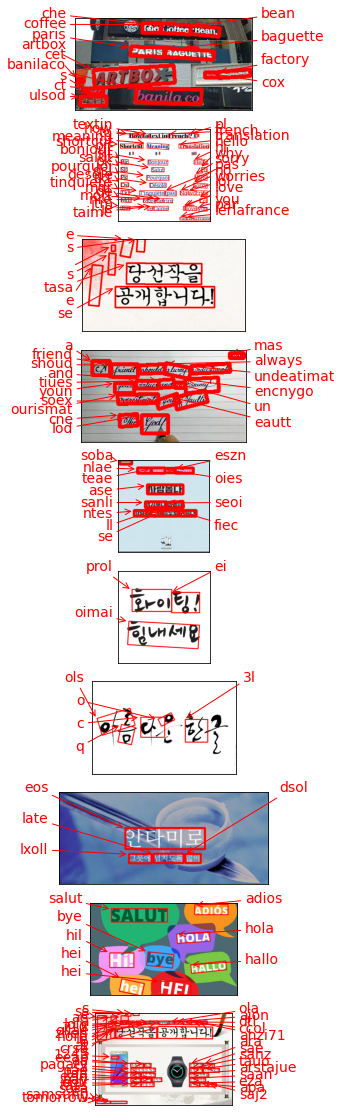

In [10]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions=prediction_groups[idx][0], ax=ax)

## 2-3. Tesseract

In [11]:
import pytesseract
from PIL import Image
from pytesseract import Output

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path, output_path='./output', lang='kor'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem3 --psm 3'
    image = Image.open(image_path)
    
    recognized_data = pytesseract.image_to_data(
        image, lang=lang,
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
        
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
        
    return cropped_image_path_list
    
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/kor'
    
    
tesseract_result_path = []
for path in file_path:
    image_path_list = crop_word_regions(path, work_dir)
    tesseract_result_path.extend(image_path_list)

- 결과 출력

In [15]:
def recognize_images(cropped_image_path_list, lang='kor'):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')
#     return recognized_data


recognize_images(tesseract_result_path)

기어

기어

에스투 '

샐럭시

누 도

바0

브'

순우리발

이

름 지으면

맛있는

떡이

생긴다?!

강선작을

공24학니디.


두.루치기

디 건

건잠러리

핑찌 을

미리끼

디니

디꺼

돌럼고리

누리때알이

기 리럴

모은

니꺼

3 오너

키 때 들

2

리리

디선제

남 2

|

호 전 -두니 -온

은히스

수점 5호

돌려리.

시간

팡찌2

는:

도:

1 <ㄴ난티(

'

기어

기어

에스투 '

샐럭시

누 도

바0

브'

순우리발

이

름 지으면

맛있는

떡이

생긴다?!

강선작을

공24학니디.


두.루치기

기어

에스투 '

샐럭시

누 도

바0

브'

순우리발

이

름 지으면

맛있는

떡이

생긴다?!

기어

에스투 '

샐럭시

기어

에스투 '

기어

기어

기어

에스투 '

샐럭시

누 도

바0

브'

순우리발

이

름 지으면

맛있는

떡이

생긴다?!

강선작을

공24학니디.


두.루치기

디 건

건잠러리

핑찌 을

미리끼

디니

디꺼

돌럼고리

누리때알이

기 리럴

모은

니꺼

3 오너

키 때 들

2

리리

디선제

남 2

|

호 전 -두니 -온

은히스

수점 5호

돌려리.

시간

팡찌2

는:

도:

1 <ㄴ난티(

'

Done


- 언어를 영어로 변경해 확인합니다.

In [16]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/eng'
tesseract_result_path = []

for path in file_path:
    image_path_list = crop_word_regions(path, work_dir, lang='eng')
    tesseract_result_path.extend(image_path_list)

recognize_images(image_path_list, lang='eng')

wA\e,

WAS

ei Al

a

+O

jo

SiS

O}

=XicF

are!

0}

ADZICE?|

Q-4AKS

ALY 6} 14 21]


5-= A] >)

tc}.

2] 4-1} 2)

3} x) >

A] BY

a4

u-4

=A

5-2} aj ef oO}

A) 2) y

3 —

tr}.

AL?

a) a=

Al

2) 4)

tc}. a}

+>]

A)

3.75 2

2.3).

3-7] 5

= 24 2).

A} 2}

S} mi] 2

rt

Bi

oh MSUNC

:

Done


## 3. 테스트 결과 시각화 
- 세 모델을 비교할 수 있는 함수

In [17]:
def ocr_model_comparison(img_idx):
    print('Original image:')
    img = cv2.imread(file_path[img_idx], cv2.IMREAD_COLOR)
    plt.imshow(img)
    plt.show()
    
    print('Google OCR API result:\n')
    detect_text(file_path[img_idx])

    print('Tesseract result:\n')
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/'+str(img_idx)
    cropped_image_path = crop_word_regions(file_path[img_idx], work_dir)
    recognize_images(cropped_image_path)
        
    print('keras-ocr result:\n')
    keras_ocr.tools.drawAnnotations(image=images[img_idx], predictions=prediction_groups[img_idx][0])

- 영어, 프랑스어, 한국어 각각 한장씩 비교해봅니다. (1, 5, 8번째 사진)

Original image:


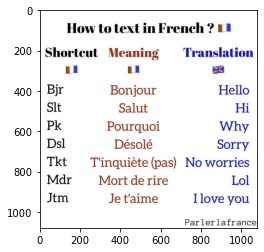

Google OCR API result:

Texts:

"How to text in French ? U
Shortcut Meaning
Translation
Bjr
Bonjour
Hello
Slt
Salut
Hi
Pk
Pourquoi
Why
Dsl
Désolé
Sorry
Tkt
T'inquiète (pas) No worries
Mdr
Mort de rire
Lol
Jtm
Je t'aime
I love you
Parlerlafrance
"
bounds: (27,62),(1071,62),(1071,1066),(27,1066)
Tesseract result:

10)

드물

! 6)

1@

×【

1

나오던 1 던 |,

> |

는

|(1.414110001112111111400 1,

은이 의)




217

2017104

【

4186

여[+

03]

111

11

2

106


0410401

링링 [강

] )9|

| )68()16@

5011?

] 가

1 10041616@

([029)

번

() \\0()1 11689

000!


[

1101

(1@

「11@

ㅣ] 6

|

소

)@

[31116

|

16

\/

을


()\ |

237 | 67 | 23 ㅠ그[건


(-그

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


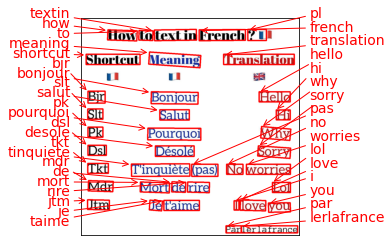

In [18]:
ocr_model_comparison(1)

Original image:


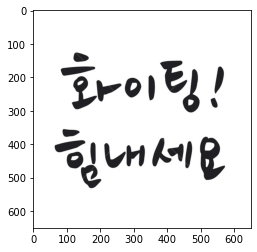

Google OCR API result:

Texts:

"화이팅!
힐내세요
"
bounds: (68,113),(570,113),(570,539),(68,539)
Tesseract result:

0 1딩 )

집\

더

2)

년

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


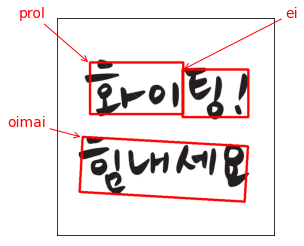

In [19]:
ocr_model_comparison(5)

Original image:


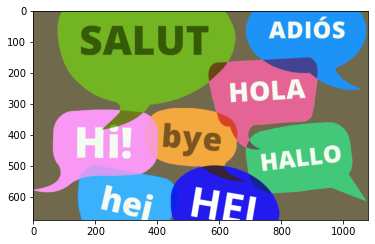

Google OCR API result:

Texts:

"SALUT
ADIÓS
HOLA
Hi! bye
HALLO
hei HEI
"
bounds: (156,22),(1003,22),(1003,677),(156,677)
Tesseract result:

오거

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


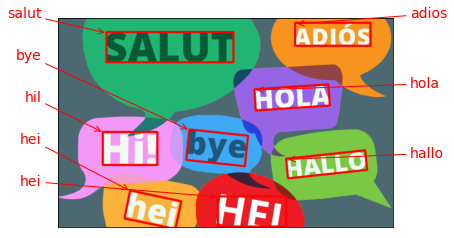

In [20]:
ocr_model_comparison(8)

- 여러 사람의 손글씨를 인식해야하기 때문에 같은 언어, 다양한 글꼴에 대한 성능을 비교합니다.

Original image:


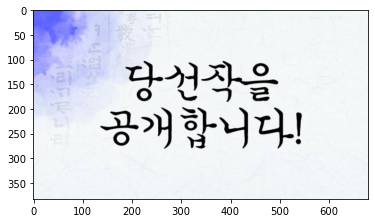

Google OCR API result:

Texts:

"당선작을
공개합니다!
"
bounds: (135,96),(551,96),(551,291),(135,291)
Tesseract result:

가토

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


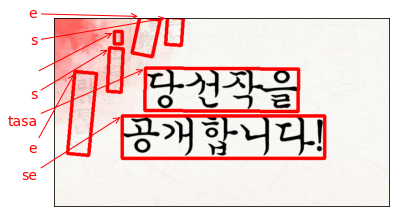

In [21]:
ocr_model_comparison(2)

Original image:


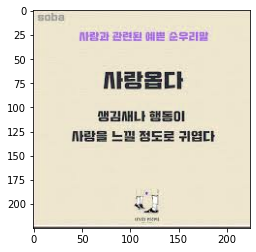

Google OCR API result:

Texts:

"soba
N람과 관련된 예쁜 순우리말
사랑옵다
맹김새나 행동이
사랑을 느낄 점도로 귀엽다
"
bounds: (5,3),(187,3),(187,136),(5,136)
Tesseract result:

1

터

4,

0 조곡

181

도

~

다

|!

~

나

르

25

[

1페

14

내

1

20

도

1]

1

;담

즐

때 --

그노 도

도

소사

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


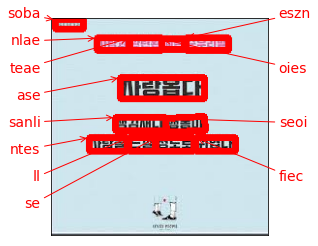

In [22]:
ocr_model_comparison(4)

Original image:


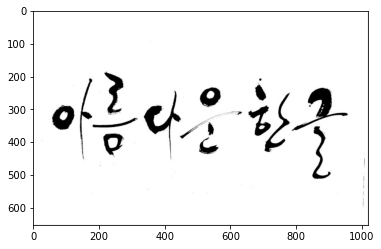

Google OCR API result:

Texts:

"아름다운 한국
3.
"
bounds: (50,177),(965,177),(965,512),(50,512)
Tesseract result:

아

은

_

1


+

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


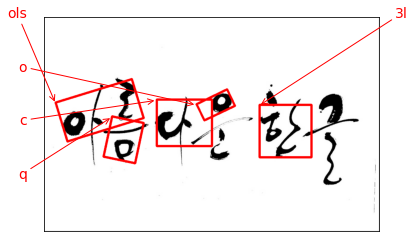

In [23]:
ocr_model_comparison(6)

Original image:


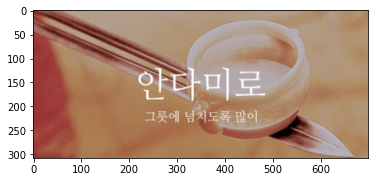

Google OCR API result:

Texts:

"안다미로
그릇에 넘치도록 많이
"
bounds: (208,114),(492,114),(492,239),(208,239)
Tesseract result:


Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


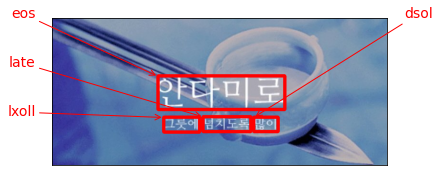

In [24]:
ocr_model_comparison(7)

- 영어 필기체 확인

Original image:


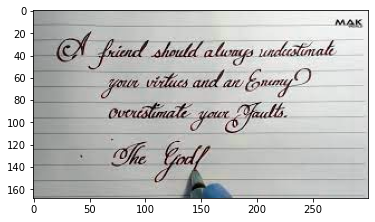

Google OCR API result:

Texts:

"MAK
N friend should always iundustimale
your Enemy
virtues and an
Oueristimate your Jaudb.
She Gad
"
bounds: (53,8),(294,8),(294,156),(53,156)
Tesseract result:

127

7 44004

트



_ 훌

2006 990

20006

~

147007.226

~ 더2

9

Done
keras-ocr result:



/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


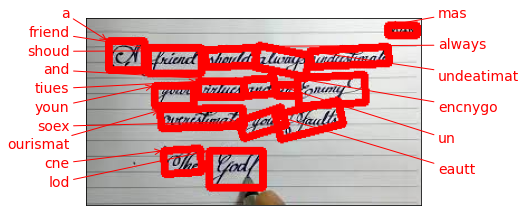

In [25]:
ocr_model_comparison(3)

## 4. 결과 분석 및 결론
손편지를 텍스트로 전환할 수 있도록, 다양한 언어, 손글씨 등에 대한 정확도를 평가하고자 했다.   

1. **Google OCR API**
- 따로 언어를 설정하지 않아도 다양한 언어를 인식했으며, 여러 글꼴에 대한 정확도도 가장 높았다. 
2. **Tesseract**
- 언어를 따로 설정해줘야해서 설정하지 않은 언어에 대한 인식율이 굉장히 낮다. 
3. **keras-ocr**
- 텍스트가 있는 위치는 잘 찾아내나, 정확도가 낮다.

**결론 : 손편지를 음성으로 읽어주는 읽는편지 서비스에는 Google OCR API가 가장 적합한 모델이다.**

# 루브릭 평가
---
1. **OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?**   

    - **읽는편지** 서비스를 기획했다.


2. **모델 평가기준이 명확하고 체계적으로 세워졌는가?**

    - 다양한 언어, 다양한 글꼴에 대한 정확도가 높아야한다는 기준을 세워 평가했다.
     
     
3. **평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?** 

    - 기준을 평가하기 위한 10장의 데이터를 사용했으며 결과를 정리했다.

    
    
# 회고
---
## 어려웠던 점 
- 변수명을 잘못 입력한 부분 외에는 크게 어려운 점이 없었다. 

## 시도한 것들
- 최대한 효율적으로 결과를 비교하기 위해 함수를 사용해서 3가지 모델을 비교했다. 

## 다짐
- 특정 task를 해결하고자 할 때, 사용할 수 있는 방법론에 대해 평가하는 법을 익힐 수 있었다. 무작정 여러가지를 써보거나, 가장 이용률이 높은 것을 사용하는 것보다 해당 task에 가장 필요한 부분이 어떤 것인지를 정하고 그 기준에 대해서 평가하면 더 유의미한 실험결과를 도출할 수 있을 것이다.